# Proyecto de ML

## Lideando con los datos

La primera parte de este proyecto se basara en entender y lidear con los datos que presentan nuestras bases de datos, a saber, los archivos train y test. Para esto primero tenemos que definir las librerias que vayamos a usar en esta parte. Se iran agregando las librerias cada vez que las usemos:

In [1]:
#Primeros paquetes
import pandas as pd #importaremos panda para leer los arvhivos csv
import numpy as np

#Segundos paquetes
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette
sns.set_style('darkgrid')

from scipy import stats
from scipy.stats import norm, skew

#Tercer paquete
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

Con la libreria pandas, tenemos material para analizar de manera profunda los archivos. Para esto primero leemos y definimos nuestras bases de datos

In [2]:
dbtrain = pd.read_csv("train.csv",sep=',',header='infer')
train = dbtrain.drop('Id',1) #quitamos la fila de ID
train.head(3) #nos da una previsualizacion de las primeras tres filas de nuestros datos.

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


Nuestra base de datos tiene tamaño

In [3]:
train.shape

(1460, 80)

Lo mimso hacemos con la base test

In [4]:
dbtest = pd.read_csv("test.csv",sep=',',header='infer')
test = dbtest.drop('Id',axis=1) #quitamos la fila de ID
test.head(3) #nos da una previsualizacion de las primeras tres filas de nuestros datos.

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


Sabemos que hay que predecir la columna SalePrice. Veamos como se comporta

In [5]:
(mu,sigma)=norm.fit(train['SalePrice'])
print(mu,sigma)

180921.19589041095 79415.29188606751


Text(0.5, 1.0, 'Distribución para SalePrice')

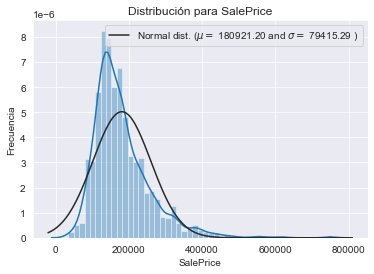

In [6]:
sns.distplot(train['SalePrice'], fit=norm);
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frecuencia')
plt.title('Distribución para SalePrice')

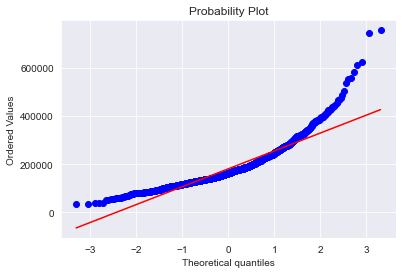

In [7]:
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

Esta manera de distribución de los datos no nos sirve para las regresiones. Mientras menos sesgados los datos mejor predicción dará. Así que aplicamos el metodo de log para 'aplanar' un poco la distribución y esto se hace con la libreria numpy

In [8]:
train['SalePrice']=np.log1p(train['SalePrice'])

y vemos cómo se comporta esta nueva distribución

Text(0.5, 1.0, 'Distribución para SalePrice')

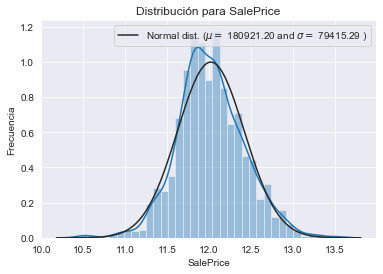

In [9]:
sns.distplot(train['SalePrice'], fit=norm);
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frecuencia')
plt.title('Distribución para SalePrice')

en donde ahora

In [10]:
(mu,sigma)=norm.fit(train['SalePrice'])
print(mu,sigma)

12.024057394918406 0.39931245219387496


es decir, ahora la distribución de los presios se parece mas a una normal con media = mu =12.02 y varianza = sigma =.4, Y esta distribución de los datos nos servirá para dar una mejor regresión.
Ahora lideamos con los valores faltantes (missing data). La primer forma de acercarse a esto es haciendo todos los valores que harán saltar errores 0. Esto es para valores como NaN o infinitos. Esto se hace con

In [11]:
train = train.fillna(0)
test = test.fillna(0)

checamos si queda algun valor faltante

In [12]:
#Check remaining missing values if any 
train_na = (train.isnull().sum() / len(train)) * 100
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :train_na})
missing_data.head()

,Missing Ratio


de igual manera podemos checarlo con el test.

Para terminar, convertimos todos los valores de tipo string en valores numéricos

In [15]:
le = preprocessing.LabelEncoder()
prep = train.dtypes.eq(np.object)
train.loc[:, prep] = train.loc[:, prep].astype(str).apply(le.fit_transform)

In [16]:
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,0,3,3,0,4,...,0,0,0,0,0,2,2008,8,4,12.247699
1,20,3,80.0,9600,1,0,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,12.109016
2,60,3,68.0,11250,1,0,0,3,0,4,...,0,0,0,0,0,9,2008,8,4,12.317171
3,70,3,60.0,9550,1,0,0,3,0,0,...,0,0,0,0,0,2,2006,8,0,11.849405
4,60,3,84.0,14260,1,0,0,3,0,2,...,0,0,0,0,0,12,2008,8,4,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,62.0,7917,1,0,3,3,0,4,...,0,0,0,0,0,8,2007,8,4,12.072547
1456,20,3,85.0,13175,1,0,3,3,0,4,...,0,0,3,0,0,2,2010,8,4,12.254868
1457,70,3,66.0,9042,1,0,3,3,0,4,...,0,0,1,3,2500,5,2010,8,4,12.493133
1458,20,3,68.0,9717,1,0,3,3,0,4,...,0,0,0,0,0,4,2010,8,4,11.864469


lo mismo con el test

In [17]:
prep = test.dtypes.eq(np.object)
test.loc[:, prep] = test.loc[:, prep].astype(str).apply(le.fit_transform)

In [18]:
test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,3,80.0,11622,1,0,3,3,1,4,...,120,0,0,3,0,0,6,2010,9,4
1,20,4,81.0,14267,1,0,0,3,1,0,...,0,0,0,0,1,12500,6,2010,9,4
2,60,4,74.0,13830,1,0,0,3,1,4,...,0,0,0,3,0,0,3,2010,9,4
3,60,4,78.0,9978,1,0,0,3,1,4,...,0,0,0,0,0,0,6,2010,9,4
4,120,4,43.0,5005,1,0,0,1,1,4,...,144,0,0,0,0,0,1,2010,9,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,5,21.0,1936,1,0,3,3,1,4,...,0,0,0,0,0,0,6,2006,9,4
1455,160,5,21.0,1894,1,0,3,3,1,4,...,0,0,0,0,0,0,4,2006,9,0
1456,20,4,160.0,20000,1,0,3,3,1,4,...,0,0,0,0,0,0,9,2006,9,0
1457,85,4,62.0,10441,1,0,3,3,1,4,...,0,0,0,3,3,700,7,2006,9,4


con esto estamos listos para hacer las regresiones